In [ ]:
# Import libraries
import os 
import warnings
import gc

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
df.shape

(48120, 4)

In [ ]:
df.count

<bound method DataFrame.count of                   DateTime  Junction  Vehicles           ID
0      2015-11-01 00:00:00         1        15  20151101001
1      2015-11-01 01:00:00         1        13  20151101011
2      2015-11-01 02:00:00         1        10  20151101021
3      2015-11-01 03:00:00         1         7  20151101031
4      2015-11-01 04:00:00         1         9  20151101041
...                    ...       ...       ...          ...
48115  2017-06-30 19:00:00         4        11  20170630194
48116  2017-06-30 20:00:00         4        30  20170630204
48117  2017-06-30 21:00:00         4        16  20170630214
48118  2017-06-30 22:00:00         4        22  20170630224
48119  2017-06-30 23:00:00         4        12  20170630234

[48120 rows x 4 columns]>

In [ ]:
df.describe

<bound method NDFrame.describe of                   DateTime  Junction  Vehicles           ID
0      2015-11-01 00:00:00         1        15  20151101001
1      2015-11-01 01:00:00         1        13  20151101011
2      2015-11-01 02:00:00         1        10  20151101021
3      2015-11-01 03:00:00         1         7  20151101031
4      2015-11-01 04:00:00         1         9  20151101041
...                    ...       ...       ...          ...
48115  2017-06-30 19:00:00         4        11  20170630194
48116  2017-06-30 20:00:00         4        30  20170630204
48117  2017-06-30 21:00:00         4        16  20170630214
48118  2017-06-30 22:00:00         4        22  20170630224
48119  2017-06-30 23:00:00         4        12  20170630234

[48120 rows x 4 columns]>

In [ ]:
df.size

192480

In [ ]:
print(df.max())
print(df.min())

DateTime    2017-06-30 23:00:00
Junction                      4
Vehicles                    180
ID                  20170630234
dtype: object
DateTime    2015-11-01 00:00:00
Junction                      1
Vehicles                      1
ID                  20151101001
dtype: object


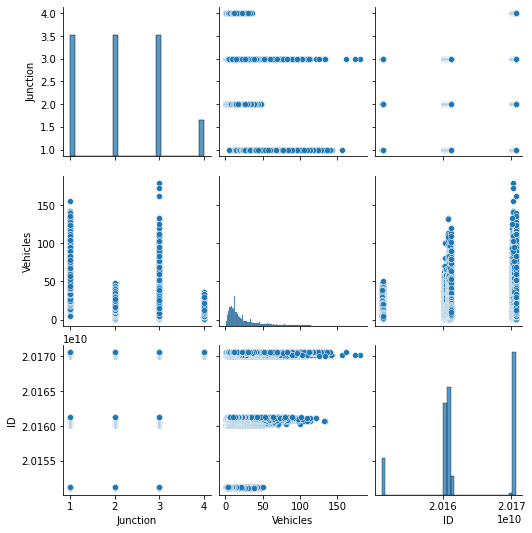

In [ ]:
sns.pairplot(df)

In [ ]:
print(df['DateTime'].value_counts())


2017-01-24 23:00:00    4
2017-02-22 09:00:00    4
2017-04-28 08:00:00    4
2017-05-04 20:00:00    4
2017-06-18 11:00:00    4
                      ..
2016-03-10 13:00:00    3
2016-03-25 20:00:00    3
2016-06-30 14:00:00    3
2016-07-08 15:00:00    3
2016-03-20 01:00:00    3
Name: DateTime, Length: 14592, dtype: int64


In [ ]:
print(df['ID'].value_counts())


20160518141    1
20160716041    1
20160415002    1
20151205141    1
20151203092    1
              ..
20160408152    1
20151104091    1
20170605141    1
20160509013    1
20170412034    1
Name: ID, Length: 48120, dtype: int64


In [ ]:
print(df['Junction'].value_counts())


3    14592
2    14592
1    14592
4     4344
Name: Junction, dtype: int64


In [ ]:
print(df['Vehicles'].value_counts())


8      2325
9      2290
7      2220
6      2206
10     2145
       ... 
173       1
141       1
135       1
140       1
127       1
Name: Vehicles, Length: 141, dtype: int64


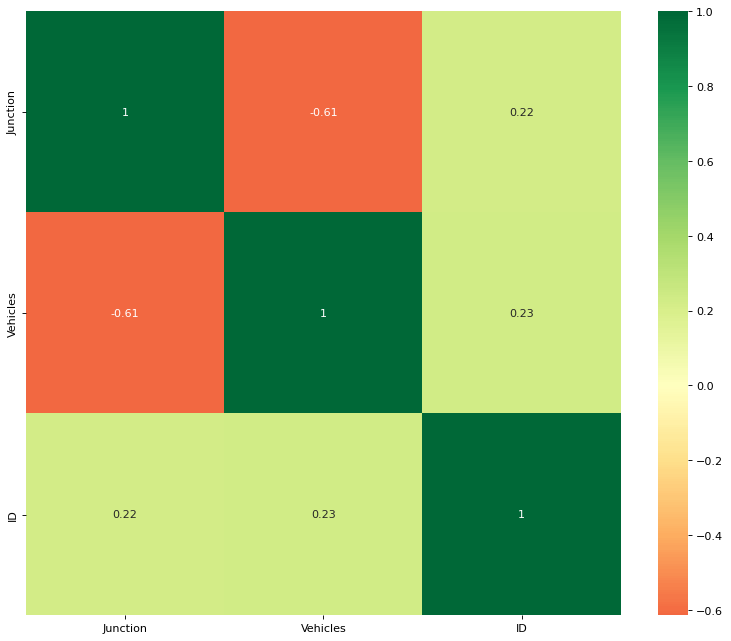

In [ ]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

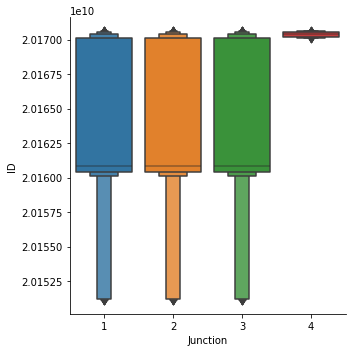

In [ ]:
sns.catplot(x='Junction',y='ID',kind='boxen',data=df)

In [ ]:
y=df.pop('DateTime')
print(y)
print('=====================')
print(df)

0        2015-11-01 00:00:00
1        2015-11-01 01:00:00
2        2015-11-01 02:00:00
3        2015-11-01 03:00:00
4        2015-11-01 04:00:00
                ...         
48115    2017-06-30 19:00:00
48116    2017-06-30 20:00:00
48117    2017-06-30 21:00:00
48118    2017-06-30 22:00:00
48119    2017-06-30 23:00:00
Name: DateTime, Length: 48120, dtype: object
       Junction  Vehicles           ID
0             1        15  20151101001
1             1        13  20151101011
2             1        10  20151101021
3             1         7  20151101031
4             1         9  20151101041
...         ...       ...          ...
48115         4        11  20170630194
48116         4        30  20170630204
48117         4        16  20170630214
48118         4        22  20170630224
48119         4        12  20170630234

[48120 rows x 3 columns]


In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df,y, test_size=0.3)
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(33684, 3)
(14436, 3)
(33684,)
(14436,)


In [ ]:
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
SVM = SVR()
ModelSVM = SVM.fit(train_X,train_y)
PredictionSVM = SVM.predict(test_X)